Movie Recommendation System using Collaborative Filtering

Tasks are as follows:

1. Task 1: Importing/Installing Libraries
2. Task 2: Importing Data
- 2.1: Importing the Data
- 2.2 Dropping extra columns
- 2.3 Checking for Missing Data
3. Task 3: EDA (Exploratory data analysis)
- 3.1 Number of movies/users
- 3.2 Sparsity of our data
- 3.3 Rating Distribution
4. Task 4: Dimensionality Reduction
- 4.1 Filter movies with less than 3 ratings
- 4.2 Filter users with less than 3 movies rated
- 4.3 Remove rarely rated movies and rarely rating users
5. Task 5: Create Training and Test Sets
- 5.1 Selecting columns used for training
- 5.2 Create surprise dataset
- 5.3 Create Train-set and Prediction-set
6. Task 6: Creating/training the model
- 6.1 Creating the model
- 6.2 Training the model
7. Task 7: Predictions
- 7.1 Predict ratings for all pairs (user, items) that are not in the training set.
- 7.2 Recommending top 3 movies based on predictions

Coursera resource: [Recommender System](https://www.coursera.org/learn/movie-recommendation-system-using-collaborative-filtering/home/welcome)

For this project, I am going to create a recommendation engine for movies for users based on there past behaviour.

I will focus on the collaborative filtering approach, that is:

- The user is recommended items that people with similar tastes and preferences liked in the past. In another word, this method predicts unknown ratings by using the similarities between users.



1.1: Installing Libraries

In [1]:
print('>> Installing Libraries')

!pip3 install pandas matplotlib numpy scikit-surprise

print('>> Libraries Installed')

>> Installing Libraries
     |████████████████████████████████| 11.8MB 5.3MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670931 sha256=60ea1f056dd79374f21a7cedfab083fb49f7237299b66acb16a0b17e56aa9c58
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise
>> Libraries Installed


1.2: Importing Libraries

I will need to import some libraries which include scikit-surprise library used to create the recommendation system


In [3]:
print('>> Importing Libraries')

import pandas as pd

from surprise import Reader, Dataset, SVD

from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

print('>> Libraries imported.')

>> Importing Libraries
>> Libraries imported.


Task 2: Importing Data

Open-source dataset from GroupLens Research (movielens.org)

2.1: Importing the Data

The dataset is saved in a ratings.csv file


In [5]:
# Load the datasets
df = pd.read_csv("ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


2.2 Dropping timestamp

I don't the timestamp columns form the users.


In [6]:
# Dropping the timestamp column

df.drop('timestamp', axis=1, inplace=True)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


2.3 Check for Missing Data

It's a good practice to check if the data has any missing values. In real world data, this is quite common and must be taken care of before any data pre-processing or model training.


In [7]:
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

Task 3: EDA (Exploratory data analysis)

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics.
- 3.1 Number of movies/users


In [8]:
n_movies = df["movieId"].nunique()
n_users = df["userId"].nunique()
print(f'Number of Unique movies: {n_movies}')
print(f'Number of Unique users: {n_users}')

Number of Unique movies: 9724
Number of Unique users: 610


3.2 Sparsity of our data

Sparsity (%) = (No of missing values/ (Total Values))X100


In [9]:
available_ratings = df['rating'].count()
total_ratings = n_movies * n_users
missing_ratings= total_ratings - available_ratings
sparsity = (missing_ratings/total_ratings)*100
print(f'Sparsity: {sparsity}')

Sparsity: 98.30003169443864


3.3 Ratings Distribution

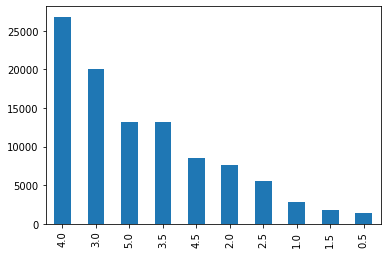

In [10]:
# Create a plot for the ratings

df['rating'].value_counts().plot(kind = 'bar')

Task 4: Dimensionality Reduction (reduce the dimensionality of the dataset, I will filter out rarely rated movies and rarely rating users)
- 4.1 Filter movies with less than 3 ratings

In [11]:
filter_movies = df['movieId'].value_counts() > 3
filter_movies = filter_movies[filter_movies].index.tolist()

4.2 Filter users with less than 3 movies rated

In [12]:
filter_users = df['userId'].value_counts() > 3
filter_users = filter_users[filter_users].index.tolist()

4.3 Remove rarely rated movies and rarely rating users

In [13]:
# Checking the original and new shape to reveal the amount of data excluded

print(f'Original Shape: {df.shape}')
df = df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]
print(f'New Shape: {df.shape}')

Original Shape: (100836, 3)
New Shape: (92394, 3)


Task 5: Create Training and Test Sets
- 5.1 Columns used for training


In [14]:
cols = ['userId', 'movieId','rating']

5.2 Create surprise dataset

In [15]:
reader = Reader(rating_scale = (0.5, 5))
data = Dataset.load_from_df(df[cols], reader)

5.3 Create Train-set and Prediction-set

In [16]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

Task 6: Creating and training the model
- 6.1 Creating the model

- SVD (Singular Value Decomposition)
- Interaction Matrix = A X B X C


In [17]:
algo = SVD(n_epochs = 25, verbose=True)

6.2 Training the model

- Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.

- Root mean squared error (RMSE): RMSE is the square root of the average of squared differences between prediction and actual observation.


In [18]:
cross_validate(algo, data, measures = ['RMSE' , 'MAE'], cv=5, verbose = True)
print('>> Training Done')

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

Task 7: Predictions
- 7.1 Predict ratings for all pairs (user, items) that are NOT in the training set.

In [19]:
predictions = algo.test(antiset)

In [20]:
# Checking the first predicition

predictions[0]

Prediction(uid=1, iid=318, r_ui=3.529119856267723, est=5, details={'was_impossible': False})

7.2 Recommending top three movies movies based on predictions

In [21]:
from collections import defaultdict
def get_top_n(predictions, n):
  top_n = defaultdict(list)
  for uid, iid, _, est, _ in predictions:
    top_n[uid].append((iid, est))
        
  for uid, user_ratings in top_n.items():
    user_ratings.sort(key = lambda x: x[1], reverse = True)
    top_n[uid] = user_ratings[:n]
  return top_n
  pass
top_n = get_top_n(predictions, n=3)
for uid, user_ratings in top_n.items():
  print(uid, [iid for (iid, rating) in user_ratings])

1 [318, 1704, 720]
2 [1197, 1223, 899]
3 [2571, 5618, 4226]
4 [1204, 913, 858]
5 [898, 246, 1104]
6 [2571, 1210, 1198]
7 [2959, 1198, 1258]
8 [1213, 3037, 1204]
9 [296, 1206, 2571]
10 [1197, 78499, 908]
11 [1193, 904, 1204]
12 [50, 260, 457]
13 [5618, 111, 2959]
14 [898, 1197, 3451]
15 [1262, 608, 924]
16 [1104, 142488, 6377]
17 [898, 177593, 926]
18 [1233, 898, 92259]
19 [1221, 778, 318]
20 [110, 1197, 2571]
21 [111, 2324, 2329]
22 [1265, 1089, 480]
23 [30707, 3037, 6016]
24 [1196, 260, 1204]
25 [318, 48516, 720]
26 [318, 858, 1235]
27 [318, 2160, 1704]
28 [246, 908, 6377]
29 [898, 3275, 5618]
30 [1089, 1197, 1208]
31 [1288, 2858, 858]
32 [3275, 908, 778]
33 [260, 2858, 58559]
34 [4993, 1198, 541]
35 [1193, 2324, 1276]
36 [58559, 4993, 1197]
37 [1258, 4973, 2959]
38 [1210, 1196, 608]
39 [2324, 2959, 4993]
40 [2019, 2959, 912]
41 [923, 1617, 27773]
42 [1198, 79132, 111]
43 [50, 223, 333]
44 [356, 898, 4973]
45 [3037, 1234, 7090]
46 [2571, 56782, 1193]
47 [1172, 1193, 2078]
48 [1148, 58